# Use shap to find key predictor in XGBoost
This notebook aims to provide an example on how to use shap algorithm to explain the output of ensemble tree models.

Here I created a dataset with 4 predictors x1, x2, x3 and x4, and the dependent variable y = 3*x1 + x2 + 0.1*x3. Notice here x4 is not used so y has no correlation with x4.

The shap algorithm should be able to pick out that x1 is the most important predictor, followed by x2 and x3. And x4 should have no predictive power. 

As seen in the last plot that is exactly what shap tree explainer output plot shows. 

In [1]:
import pandas as pd
import numpy as np
import xgboost
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import r2_score

/Users/ixc407/opt/miniconda3/envs/xgb/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# create example data. X is random and y follows a fomular
X = np.random.rand(1000, 4)
print('part of X: ', X[:10, :])
y = X[:, 0] * 3 + X[:, 1] * 1 + X[:, 2] * 0.1
print('part of y: ', y[:10])
Xy_dmatrix = xgboost.DMatrix(X, label=y)

part of X:  [[1.34532614e-01 9.53079713e-01 8.63177432e-01 6.16032698e-01]
 [1.64438019e-01 8.17949808e-01 1.61731354e-01 5.76304266e-02]
 [6.17904513e-02 4.50764114e-01 4.73105592e-01 3.61703506e-01]
 [9.04620154e-01 4.69138108e-02 6.98274984e-01 6.44318149e-01]
 [7.89212493e-01 6.37421159e-01 3.62699568e-01 4.90255610e-01]
 [4.00579812e-01 5.86330373e-01 7.50888057e-04 6.37663414e-01]
 [5.73488880e-01 4.68934651e-01 2.79251104e-01 8.34408135e-01]
 [2.50922030e-01 8.65592445e-02 9.18202247e-01 4.88803868e-01]
 [9.63439283e-01 5.94559610e-02 6.94202969e-01 5.35885350e-01]
 [5.24941794e-01 5.88815743e-01 2.90206535e-01 7.93512318e-02]]
part of y:  [1.4429953  1.327437   0.68344603 2.83060177 3.04132859 1.7881449
 2.2173264  0.93114556 3.01919411 2.19266178]


In [12]:
# train model and check the performance
params = {'eta': 1, 'max_depth': 3, }
model = xgboost.train(params=params, dtrain=Xy_dmatrix)

y_pred = model.predict(Xy_dmatrix)
print('R2 is: ', round(r2_score(y, y_pred), 3))

R2 is:  0.991


In [13]:
# performs tree shap analysis
explainer = shap.TreeExplainer(model = model)
shap_array = explainer.shap_values(Xy_dmatrix)
# look at the output of shap values
print('The shap output is an array of the same size of train data: ', shap_array.shape)

The shap output is an array of the same size of train data:  (1000, 4)


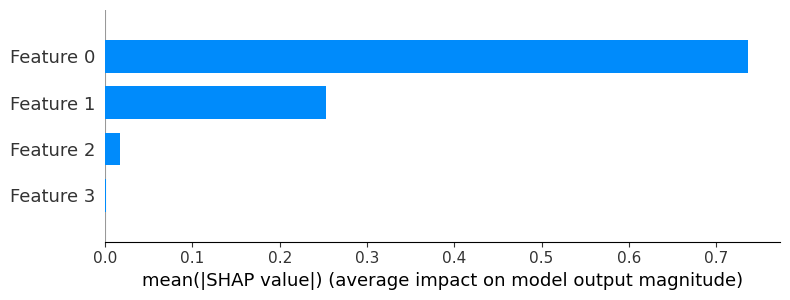

In [14]:
# list the key predictors. The results makes sense since y = 3*x1 + x2 + 0.1*x3
shap.summary_plot(shap_array, X, plot_type='bar')